In [439]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import seaborn as sns
import seaborn as sb
from config import gkey

gmaps.configure(api_key=gkey)

In [440]:
structure_loss = pd.read_csv ('Fire.csv')
structure_loss
#Group inconsistent battallion names into one single integer battallion
structure_loss=structure_loss.replace({
    "2B":"2",
    "2C":"2",
    "3C":"3",
    "4C":"4",
    "5B":"5",
    "6A":"6",
    "7A":"7",
    "7B":"7",
    "7B`":"7",
    "8B":"8",
    "8C":"8",
    "9A":"9",
    "9C":"9"   
})
structure_loss

,index,ID,DATE,TIME,ZIP,BATTALION,SHIFT,COUNCIL DISTRICT,STRUCTURE TYPE,BUILDING STORIES,...,TOTAL VALUE,STRUCTURE LOSS,CONTENTS LOSS,TOTAL SAVED,PERCENTAGE LOSS,SPRINKER SYSTEM,ALARM SYSTEM,ADDRESS,Lat,Lng
0,0,17961.0,10/29/2019,08:21 PM,75216.0,6,A,4.0,DWELLING,1.0,...,166370.0,-5000.0,0.0,161370.0,3.01,NaN,NaN,1325 S MARSALIS AVE,32.732107,-96.814783
1,1,17962.0,10/30/2019,03:42 AM,75229.0,7,A,13.0,DWELLING,1.0,...,535470.0,-10000.0,0.0,525470.0,1.87,NaN,NaN,10728 LATHROP DR,32.894248,-96.857108
2,2,17963.0,10/30/2019,10:47 AM,75241.0,5,B,3.0,DWELLING,1.0,...,306000.0,-5000.0,-15000.0,286000.0,6.54,NaN,NaN,6205 S R L THORNTON SERV,32.694543,-96.824020
3,3,17964.0,10/30/2019,05:32 PM,75243.0,2,B,10.0,DWELLING,1.0,...,126710.0,-8000.0,-4000.0,114710.0,9.47,NaN,NaN,12044 WILLOWDELL DR,32.913584,-96.764435
4,4,17965.0,10/30/2019,11:03 AM,75212.0,9,B,6.0,DWELLING,1.0,...,84000.0,-45000.0,-10000.0,29000.0,65.48,NaN,NaN,2212 LAPSLEY ST,32.769986,-96.908816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,616,18414.0,09/03/2020,02:12 AM,75227.0,8,A,7.0,DWELLING,1.0,...,261000.0,-15000.0,-2500.0,243500.0,6.70,NO,YES,5024 URBAN AVE,32.783636,-96.694285
617,617,18459.0,09/19/2020,08:49 AM,75214.0,3,C,14.0,APARTMENTS,2.0,...,2240263.0,-2500.0,0.0,2237763.0,0.11,NaN,UNK,5307 GASTON AVE,32.803882,-96.765385
618,618,18496.0,09/24/2020,07:11 PM,75243.0,4,B,10.0,APARTMENTS,3.0,...,7357830.0,-200.0,0.0,7357630.0,0.00,YES,UKN,218 W FERRIS BRANCH BLVD,32.903830,-96.726209
619,619,18514.0,09/30/2020,07:15 AM,75253.0,8,B,8.0,SHED,1.0,...,1500.0,-500.0,-100.0,900.0,40.00,NO,NO,14770 LASATER RD,32.692136,-96.567056


In [441]:
structure_loss["STRUCTURE TYPE"].value_counts

<bound method IndexOpsMixin.value_counts of 0        DWELLING
1        DWELLING
2        DWELLING
3        DWELLING
4        DWELLING
          ...    
616      DWELLING
617    APARTMENTS
618    APARTMENTS
619          SHED
620      DWELLING
Name: STRUCTURE TYPE, Length: 621, dtype: object>

In [442]:
unique_structure_df = structure_loss["STRUCTURE TYPE"].unique()

unique_structure_df

array(['DWELLING', 'APARTMENTS', 'MOTEL', 'COMMERCIAL', 'WAREHOUSE',
       'CHURCH', 'MANUFACTURING', 'SHED', 'COMMERICAL', '4 PLEX',
       'APARTMENT', 'GARAGE', 'RETAIL', 'RESTAURANT', 'SCHOOL',
       'CONDOMINUM', 'MOBILE HOME', 'CONDOMINIUMS', 'PORTABLE BLDG',
       'CONDOMINIUM', 'COMMERICAL/WAREHOUSE', 'CARPORT', 'DUPLEX',
       'OFFICE', 'HOTEL', 'LAUNDRY ROOM', 'SHOPPING MALL', 'CONDO',
       'TOWNHOME', 'APARTMENTS (ROOF TOP)', 'DWELLING (WINDOW)',
       'MANUFACTURE'], dtype=object)

In [443]:
avg_loss_structure = structure_loss.groupby(["STRUCTURE TYPE"]).mean()["PERCENTAGE LOSS"]

print(avg_loss_structure)

STRUCTURE TYPE
4 PLEX                    1.500000
APARTMENT                 0.475000
APARTMENTS                3.470737
APARTMENTS (ROOF TOP)     0.010000
CARPORT                   0.460000
CHURCH                    3.750000
COMMERCIAL                7.965082
COMMERICAL               23.023333
COMMERICAL/WAREHOUSE      1.000000
CONDO                     1.035000
CONDOMINIUM              17.180000
CONDOMINIUMS              8.932500
CONDOMINUM                3.900000
DUPLEX                   12.583333
DWELLING                 16.985092
DWELLING (WINDOW)         0.530000
GARAGE                   14.255000
HOTEL                     0.126667
LAUNDRY ROOM              0.040000
MANUFACTURE               1.400000
MANUFACTURING             0.000000
MOBILE HOME              18.930000
MOTEL                     3.553333
OFFICE                    5.000000
PORTABLE BLDG             0.000000
RESTAURANT                1.502000
RETAIL                    0.070000
SCHOOL                    0.006667
SHED 

In [444]:
structure_loss = structure_loss.replace({
     "APARTMENT":"APARTMENT",
     "APARTMENTS":"APARTMENT",     
     "APARTMENTS (ROOF TOP)":"APARTMENT",      
    
     "COMMERCIAL":"COMMERCIAL",                
     "COMMERICAL":"COMMERCIAL",                  
     "COMMERICAL/WAREHOUSE": "COMMERCIAL",
     
     "CONDO": "CONDOMINIUM",                   
     "CONDOMINIUM": "CONDOMINIUM",                    
     "CONDOMINIUMS": "CONDOMINIUM",
     "CONDOMINUM": "CONDOMINIUM",
     
     "DWELLING": "DWELLING",                               
     "DWELLING (WINDOW)": "DWELLING", 
    
     "4 PLEX": "FOURPLEX",
    
     "MANUFACTURE":"MANUFACTURE",                               
     "MANUFACTURING": "MANUFACTURE",
    
     "PORTABLE BLDG":"PORTABLE BUILDING",
    
     "HOTEL": "LODGING",
     "MOTEL": "LODGING"
     
    })
structure_loss.head()

,index,ID,DATE,TIME,ZIP,BATTALION,SHIFT,COUNCIL DISTRICT,STRUCTURE TYPE,BUILDING STORIES,...,TOTAL VALUE,STRUCTURE LOSS,CONTENTS LOSS,TOTAL SAVED,PERCENTAGE LOSS,SPRINKER SYSTEM,ALARM SYSTEM,ADDRESS,Lat,Lng
0,0,17961.0,10/29/2019,08:21 PM,75216.0,6,A,4.0,DWELLING,1.0,...,166370.0,-5000.0,0.0,161370.0,3.01,NaN,NaN,1325 S MARSALIS AVE,32.732107,-96.814783
1,1,17962.0,10/30/2019,03:42 AM,75229.0,7,A,13.0,DWELLING,1.0,...,535470.0,-10000.0,0.0,525470.0,1.87,NaN,NaN,10728 LATHROP DR,32.894248,-96.857108
2,2,17963.0,10/30/2019,10:47 AM,75241.0,5,B,3.0,DWELLING,1.0,...,306000.0,-5000.0,-15000.0,286000.0,6.54,NaN,NaN,6205 S R L THORNTON SERV,32.694543,-96.824020
3,3,17964.0,10/30/2019,05:32 PM,75243.0,2,B,10.0,DWELLING,1.0,...,126710.0,-8000.0,-4000.0,114710.0,9.47,NaN,NaN,12044 WILLOWDELL DR,32.913584,-96.764435
4,4,17965.0,10/30/2019,11:03 AM,75212.0,9,B,6.0,DWELLING,1.0,...,84000.0,-45000.0,-10000.0,29000.0,65.48,NaN,NaN,2212 LAPSLEY ST,32.769986,-96.908816


***Total Number of Unique Structure Types***

In [445]:
avg_loss_structure = structure_loss.groupby(["STRUCTURE TYPE"]).count()["PERCENTAGE LOSS"]

avg_loss_structure

STRUCTURE TYPE
APARTMENT            193
CARPORT                1
CHURCH                 2
COMMERCIAL            68
CONDOMINIUM           12
DUPLEX                 3
DWELLING             274
FOURPLEX               1
GARAGE                12
LAUNDRY ROOM           1
LODGING               12
MANUFACTURE            2
MOBILE HOME            3
OFFICE                 3
PORTABLE BUILDING      1
RESTAURANT             5
RETAIL                 1
SCHOOL                 3
SHED                  13
SHOPPING MALL          1
TOWNHOME               2
WAREHOUSE              8
Name: PERCENTAGE LOSS, dtype: int64

In [446]:
#need Bar Chart

***Average Percentage Loss per Structure***

In [447]:
avg_loss_structure = structure_loss.groupby(["STRUCTURE TYPE"]).mean()["PERCENTAGE LOSS"]

avg_loss_structure

STRUCTURE TYPE
APARTMENT             3.421762
CARPORT               0.460000
CHURCH                3.750000
COMMERCIAL            9.191324
CONDOMINIUM           7.884167
DUPLEX               12.583333
DWELLING             16.925036
FOURPLEX              1.500000
GARAGE               14.255000
LAUNDRY ROOM          0.040000
LODGING               1.840000
MANUFACTURE           0.700000
MOBILE HOME          18.930000
OFFICE                5.000000
PORTABLE BUILDING     0.000000
RESTAURANT            1.502000
RETAIL                0.070000
SCHOOL                0.006667
SHED                 30.586154
SHOPPING MALL         0.000000
TOWNHOME              5.675000
WAREHOUSE            11.431250
Name: PERCENTAGE LOSS, dtype: float64

['APARTMENT' 'CARPORT' 'CHURCH' 'COMMERCIAL' 'CONDOMINIUM' 'DUPLEX'
 'DWELLING' 'FOURPLEX' 'GARAGE' 'LAUNDRY ROOM' 'LODGING' 'MANUFACTURE'
 'MOBILE HOME' 'OFFICE' 'PORTABLE BUILDING' 'RESTAURANT' 'RETAIL' 'SCHOOL'
 'SHED' 'SHOPPING MALL' 'TOWNHOME' 'WAREHOUSE']


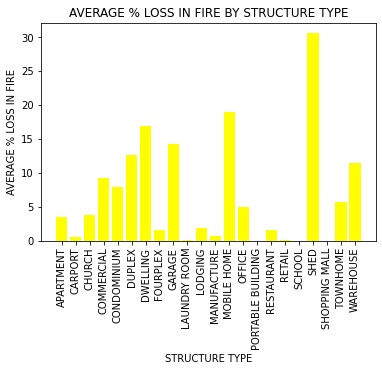

In [448]:
unique_structure=structure_loss['STRUCTURE TYPE'].unique()
unique_structure.sort()
print(unique_structure)

x_axis = unique_structure
y_axis = avg_loss_structure
plt.xticks(rotation=90)
plt.bar(x_axis, y_axis, color=['yellow'])

plt.xlabel("STRUCTURE TYPE")
plt.ylabel("AVERAGE % LOSS IN FIRE")
plt.title("AVERAGE % LOSS IN FIRE BY STRUCTURE TYPE")

#plt.tight_layout()
plt.show()

***Merge All Residential Buildings***

In [449]:
new_structure_loss = structure_loss.replace({
     "APARTMENT":"RESIDENTIAL",
     "APARTMENTS":"RESIDENTIAL",     
     "APARTMENTS (ROOF TOP)":"RESIDENTIAL",
    
     "DUPLEX":"RESIDENTIAL",
    
     "DWELLING":"RESIDENTIAL",
                          
     "CONDO":"RESIDENTIAL",
     "CONDOMINIUM":"RESIDENTIAL",
     "CONDOMINIUMS":"RESIDENTIAL",
     "CONDOMINUM":"RESIDENTIAL",

     "DWELLING":"RESIDENTIAL", 
     "DWELLING (WINDOW)":"RESIDENTIAL",
    
     "FOURPLEX":"RESIDENTIAL",
    
     "MANUFACTURE":"RESIDENTIAL",
     "MANUFACTURING":"RESIDENTIAL",
    
     "MOBILE HOME":"RESIDENTIAL",
    
     "TOWNHOME":"RESIDENTIAL",
        
    })
new_structure_loss.head()

,index,ID,DATE,TIME,ZIP,BATTALION,SHIFT,COUNCIL DISTRICT,STRUCTURE TYPE,BUILDING STORIES,...,TOTAL VALUE,STRUCTURE LOSS,CONTENTS LOSS,TOTAL SAVED,PERCENTAGE LOSS,SPRINKER SYSTEM,ALARM SYSTEM,ADDRESS,Lat,Lng
0,0,17961.0,10/29/2019,08:21 PM,75216.0,6,A,4.0,RESIDENTIAL,1.0,...,166370.0,-5000.0,0.0,161370.0,3.01,NaN,NaN,1325 S MARSALIS AVE,32.732107,-96.814783
1,1,17962.0,10/30/2019,03:42 AM,75229.0,7,A,13.0,RESIDENTIAL,1.0,...,535470.0,-10000.0,0.0,525470.0,1.87,NaN,NaN,10728 LATHROP DR,32.894248,-96.857108
2,2,17963.0,10/30/2019,10:47 AM,75241.0,5,B,3.0,RESIDENTIAL,1.0,...,306000.0,-5000.0,-15000.0,286000.0,6.54,NaN,NaN,6205 S R L THORNTON SERV,32.694543,-96.824020
3,3,17964.0,10/30/2019,05:32 PM,75243.0,2,B,10.0,RESIDENTIAL,1.0,...,126710.0,-8000.0,-4000.0,114710.0,9.47,NaN,NaN,12044 WILLOWDELL DR,32.913584,-96.764435
4,4,17965.0,10/30/2019,11:03 AM,75212.0,9,B,6.0,RESIDENTIAL,1.0,...,84000.0,-45000.0,-10000.0,29000.0,65.48,NaN,NaN,2212 LAPSLEY ST,32.769986,-96.908816


***New Total Number of Unique Structure Types***

In [450]:
total_loss_structure = new_structure_loss.groupby(["STRUCTURE TYPE"]).count()["PERCENTAGE LOSS"]

total_loss_structure

STRUCTURE TYPE
CARPORT                1
CHURCH                 2
COMMERCIAL            68
GARAGE                12
LAUNDRY ROOM           1
LODGING               12
OFFICE                 3
PORTABLE BUILDING      1
RESIDENTIAL          490
RESTAURANT             5
RETAIL                 1
SCHOOL                 3
SHED                  13
SHOPPING MALL          1
WAREHOUSE              8
Name: PERCENTAGE LOSS, dtype: int64

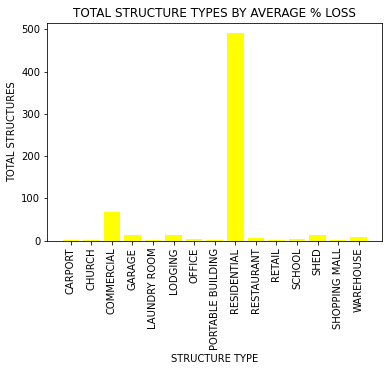

In [451]:
unique_structure=new_structure_loss['STRUCTURE TYPE'].unique()
unique_structure.sort()
#print(unique_structure)

x_axis = unique_structure
y_axis = total_loss_structure
plt.xticks(rotation=90)
plt.bar(x_axis, y_axis, color=['yellow'])

plt.xlabel("STRUCTURE TYPE")
plt.ylabel("TOTAL STRUCTURES")
plt.title("TOTAL STRUCTURE TYPES BY AVERAGE % LOSS")

#plt.tight_layout()
plt.show()

***Average Percentage Loss per Structure after Residential Merge***

In [452]:
new_avg_loss_structure = structure_loss.groupby(["STRUCTURE TYPE"]).mean()["PERCENTAGE LOSS"]

new_avg_loss_structure

STRUCTURE TYPE
APARTMENT             3.421762
CARPORT               0.460000
CHURCH                3.750000
COMMERCIAL            9.191324
CONDOMINIUM           7.884167
DUPLEX               12.583333
DWELLING             16.925036
FOURPLEX              1.500000
GARAGE               14.255000
LAUNDRY ROOM          0.040000
LODGING               1.840000
MANUFACTURE           0.700000
MOBILE HOME          18.930000
OFFICE                5.000000
PORTABLE BUILDING     0.000000
RESTAURANT            1.502000
RETAIL                0.070000
SCHOOL                0.006667
SHED                 30.586154
SHOPPING MALL         0.000000
TOWNHOME              5.675000
WAREHOUSE            11.431250
Name: PERCENTAGE LOSS, dtype: float64

['APARTMENT' 'CARPORT' 'CHURCH' 'COMMERCIAL' 'CONDOMINIUM' 'DUPLEX'
 'DWELLING' 'FOURPLEX' 'GARAGE' 'LAUNDRY ROOM' 'LODGING' 'MANUFACTURE'
 'MOBILE HOME' 'OFFICE' 'PORTABLE BUILDING' 'RESTAURANT' 'RETAIL' 'SCHOOL'
 'SHED' 'SHOPPING MALL' 'TOWNHOME' 'WAREHOUSE']


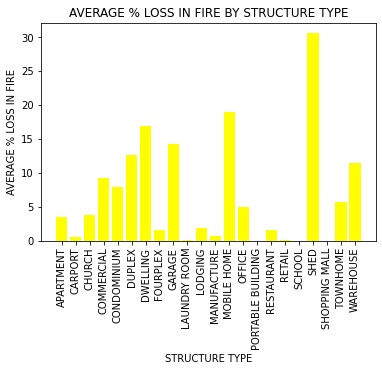

In [453]:
new_unique_structure=structure_loss['STRUCTURE TYPE'].unique()
new_unique_structure.sort()
print(new_unique_structure)

x_axis = new_unique_structure
y_axis = new_avg_loss_structure
plt.xticks(rotation=90)
plt.bar(x_axis, y_axis, color=['yellow'])

plt.xlabel("STRUCTURE TYPE")
plt.ylabel("AVERAGE % LOSS IN FIRE")
plt.title("AVERAGE % LOSS IN FIRE BY STRUCTURE TYPE")

#plt.tight_layout()
plt.show()

In [454]:
# Configure gmaps.
gmaps.configure(api_key=gkey)

In [455]:
# Use the Lat and Lng as locations and Humidity as the weight.
locations = structure_loss[["Lat", "Lng"]]
structure_type = structure_loss["STRUCTURE TYPE"].astype(float)
heat_layer = gmaps.heatmap_layer(locations, weights=structure_type, 
                                 dissipating=False, max_intensity=3.5, 
                                 point_radius=0.02)

ValueError: could not convert string to float: 'DWELLING'

In [ ]:
# Add Heatmap layer to map.
fig = gmaps.figure(map_type="HYBRID", center=(35.0, -80.0), zoom_level=3)
fig.add_layer(heat_layer)
fig

In [ ]:
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, 
                                 dissipating=False, max_intensity=100,
                                 point_radius=2)

marker_layer = gmaps.marker_layer(locations_two, info_box_content=hotel_info)

# Display figure
fig = gmaps.figure()
fig = gmaps.figure(map_type="HYBRID", center=(10.0, -60.0), zoom_level=2)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
fig

In [ ]:
lat_for_map=structure_loss['Lat'].astype(float)
lat_for_map.astype(float)

lng_for_map=structure_loss['Lng'].astype(float)
lng_for_map.astype(float)

In [ ]:
#HEATMAP

# Store 'Lat' and 'Lng' into  locations 
coordinates = structure_loss[["Lat", "Lng"]].astype(float)

percentage_value_lost = structure_loss["STRUCTURE TYPE"].dtype("STRUCTURE TYPE")

In [ ]:
info_box_template = """
<dl>
<dt>Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]
locations_two = hotel_df[["Lat", "Lng"]]

In [ ]:
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(coordinates, weights=percentage_value_lost,
                                 dissipating=False, max_intensity=3.5, point_radius=0.02)

fig.add_layer(heat_layer)

fig